In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
     


In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data('digits')

11490434/11490434 [==============================] - 3s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

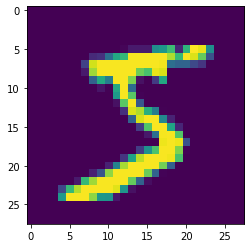

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [8]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

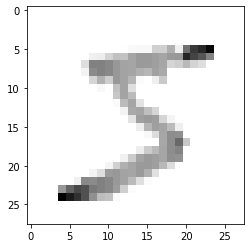

In [9]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
print(y_train[0])

5


In [12]:

import numpy as np
i=28
x_trainr=np.array(x_train).reshape(-1,i,i,1)
x_testr=np.array(x_test).reshape(-1,i,i,1)
print("Training Samples Dimension",x_trainr.shape)
print("Testing Samples Dimension",x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
     


In [14]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [16]:
print("Total Training Samples=",len(x_trainr))

Total Training Samples= 60000


In [17]:
from keras.api._v2.keras import metrics
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
   

In [18]:
hist=model.fit(x_trainr,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.2136 - accuracy: 0.9351 - val_loss: 0.0876 - val_accuracy: 0.9739
Epoch 2/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0664 - accuracy: 0.9793 - val_loss: 0.0547 - val_accuracy: 0.9839
Epoch 3/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0654 - val_accuracy: 0.9788
Epoch 4/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0466 - val_accuracy: 0.9866
Epoch 5/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.0519 - val_accuracy: 0.9852
Epoch 6/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0219 - accuracy: 0.9925 - val_loss: 0.0456 - val_accuracy: 0.9857
Epoch 7/10
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.0481 -

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
hist.history


{'loss': [0.21360750496387482,
  0.06642679125070572,
  0.04630790650844574,
  0.03384196385741234,
  0.02642260678112507,
  0.02187061868607998,
  0.015520107001066208,
  0.012595709413290024,
  0.011922968551516533,
  0.009609362110495567],
 'accuracy': [0.9351041913032532,
  0.9793124794960022,
  0.9858333468437195,
  0.989062488079071,
  0.9914374947547913,
  0.9925416707992554,
  0.9949583411216736,
  0.995437502861023,
  0.9962083101272583,
  0.9964166879653931],
 'val_loss': [0.0876488983631134,
  0.05471714958548546,
  0.06542248278856277,
  0.046625275164842606,
  0.05186998099088669,
  0.04563572630286217,
  0.04811271280050278,
  0.05244799330830574,
  0.04203329607844353,
  0.04454417526721954],
 'val_accuracy': [0.9739166498184204,
  0.9839166402816772,
  0.9788333177566528,
  0.9865833520889282,
  0.9852499961853027,
  0.9856666922569275,
  0.987416684627533,
  0.9851666688919067,
  0.9905833601951599,
  0.9893333315849304]}

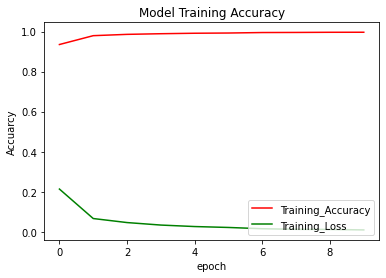

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],'-r',label='Training_Accuracy')
plt.plot(hist.history['loss'],'-g',label='Training_Loss')

plt.title('Model Training Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()